In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Text(0.5, 1.0, 'android os z')

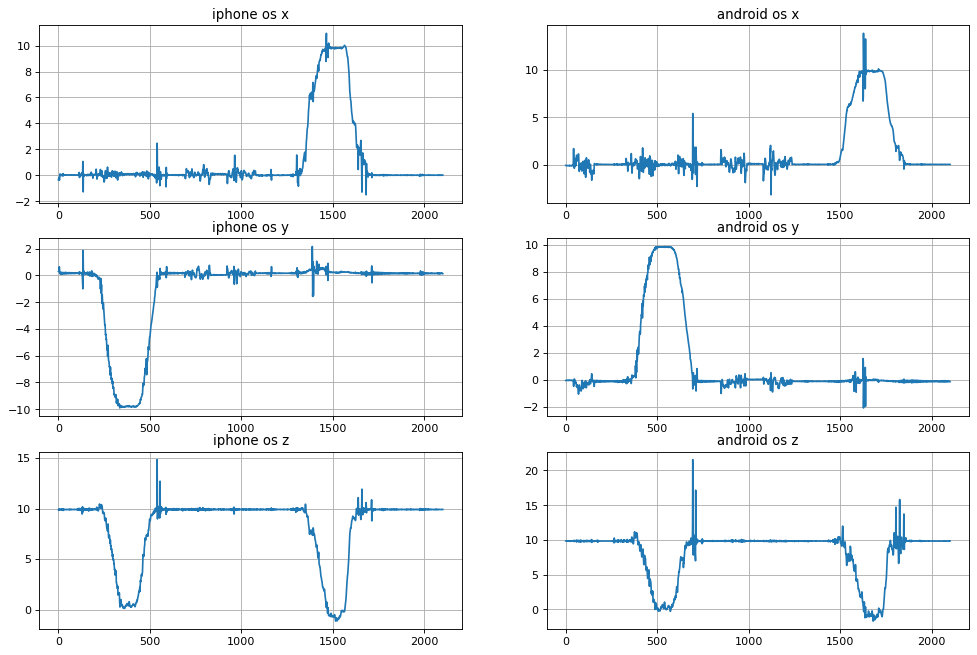

In [2]:
acelMich = pd.read_csv('Michal/AccelerometerUncalibrated.csv').drop(columns = ['time', 'seconds_elapsed'])
acelKasper = pd.read_csv('Kasper/AccelerometerUncalibrated.csv').drop(columns = ['time', 'seconds_elapsed'])

figure(figsize=(15, 10), dpi=80)



plt.subplot(3,2,1)
plt.plot(acelKasper['x'] * 9.81)
plt.grid()
plt.title('iphone os x')

plt.subplot(3,2,2)
plt.plot(acelMich['x'])
plt.grid()
plt.title('android os x')

plt.subplot(3,2,3)
plt.plot(acelKasper['y'] * 9.81)
plt.grid()
plt.title('iphone os y')

plt.subplot(3,2,4)
plt.plot(acelMich['y'])
plt.grid()
plt.title('android os y')

plt.subplot(3,2,5)
plt.plot(acelKasper['z'] * 9.81)
plt.grid()
plt.title('iphone os z')

plt.subplot(3,2,6)
plt.plot(acelMich['z'])
plt.grid()
plt.title('android os z')

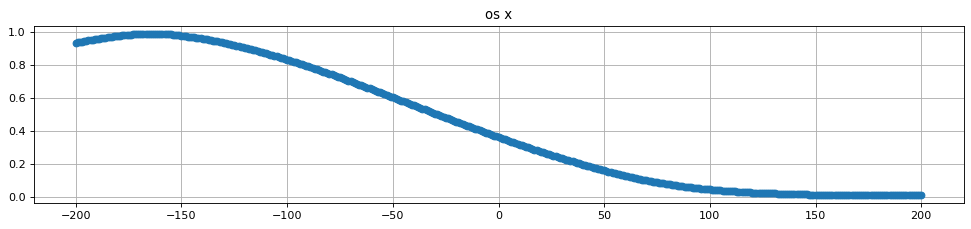

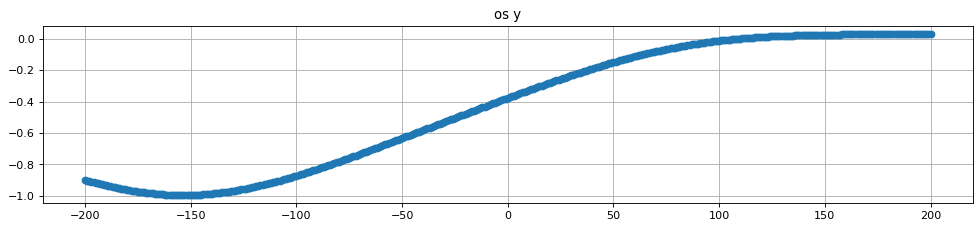

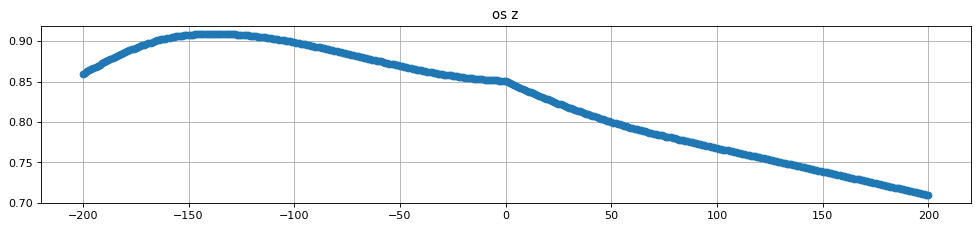

In [3]:
for ind, var in enumerate(["x","y","z"]):
    figure(figsize=(15, 10), dpi=80)
    plt.subplot(3,1,ind+1)
    plt.xcorr(acelKasper[var], acelMich[var], usevlines=False, maxlags=200, normed=True, lw=5)
    plt.grid(True)
    plt.title('os '+var)


In [4]:
def correlation(x, y):
    shortest = min(x.shape[0], y.shape[0])
    return np.corrcoef(x.iloc[:shortest].values, y.iloc[:shortest].values)[0, 1]

In [5]:
from scipy.signal import correlate
from scipy.signal import correlation_lags
def shift_for_maximum_correlation(x, y):
    correlation = correlate(x, y, mode="full")
    lags = correlation_lags(x.size, y.size, mode="full")
    lag = lags[np.argmax(correlation)]
    print(f"Best lag: {lag}")
    if lag < 0:
        y = y.iloc[abs(lag):].reset_index(drop=True)
    else:
        x = x.iloc[lag:].reset_index(drop=True)
    return x, y

In [6]:
def plot_correlation(x, y, text):
    x.plot(label="x")
    y.plot(label="y")
    plt.title(f"Correlation {text}: {correlation(x, y)}")
    plt.legend(loc="best")
    plt.show()

Best lag: -164


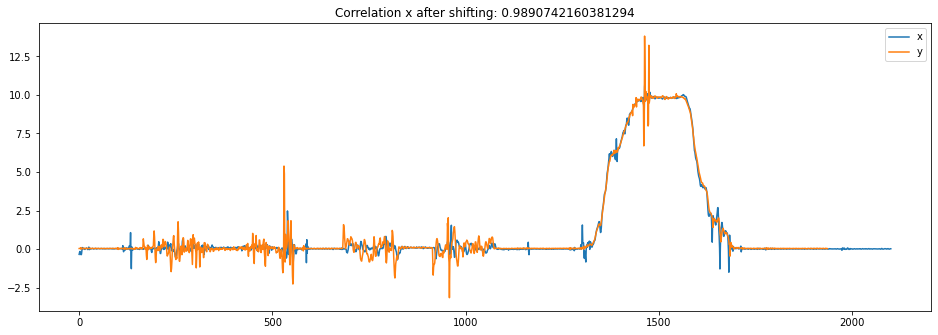

Best lag: -152


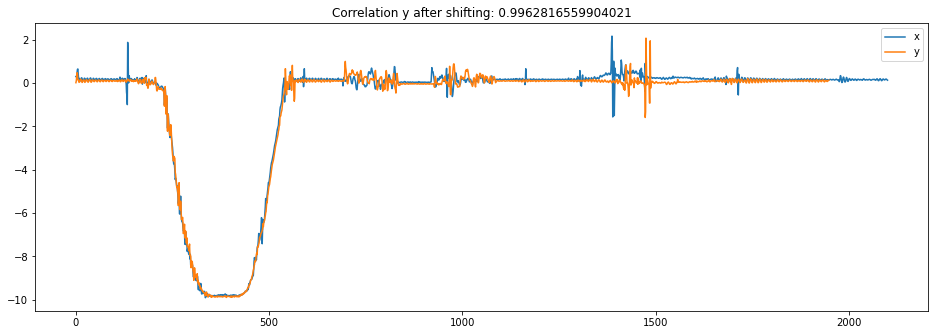

Best lag: -139


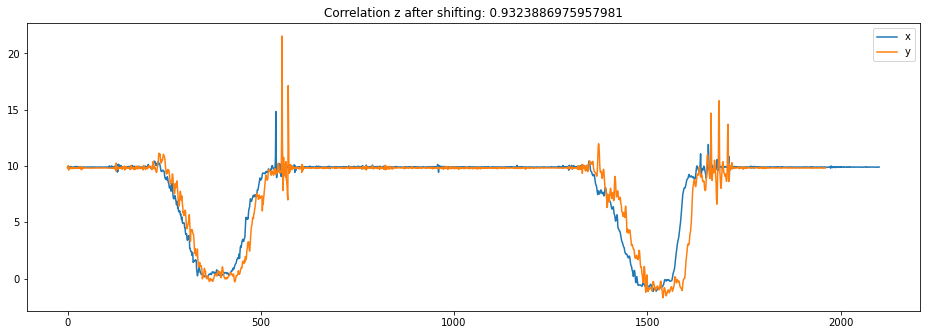

In [7]:
roznica=[]
for ind, var in enumerate(["x","y","z"]):
    plt.figure(figsize=(16, 18))
    plt.subplot(3,1,ind+1)
    max_val = True if var!="y" else False
    temp_1 = acelKasper[var]* 9.81
    temp_2 =  acelMich[var] if var!="y" else -acelMich[var]
    shifted_x, shifted_y = shift_for_maximum_correlation(temp_1, temp_2 )
    plot_correlation(shifted_x, shifted_y, text=var+" after shifting")
    roznica.append([temp_1 - temp_2 ,shifted_x -shifted_y])

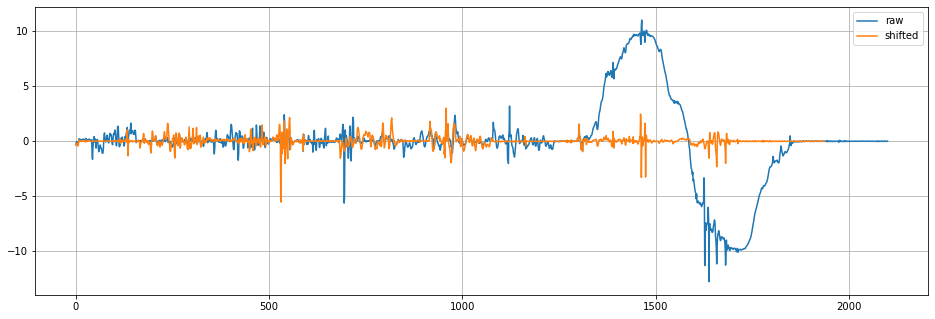

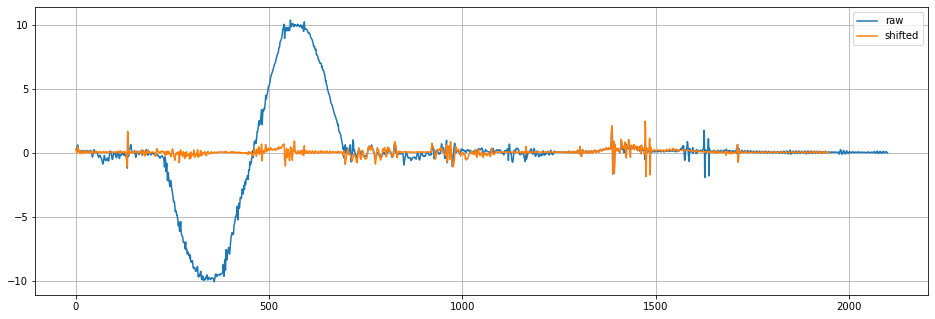

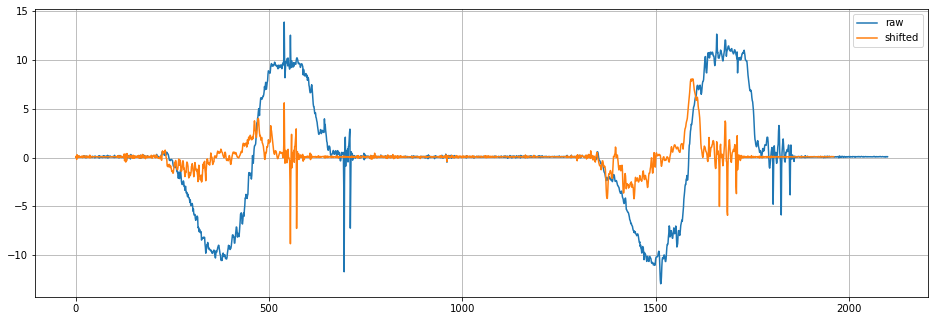

In [8]:
for ind, row in enumerate(roznica):
    plt.figure(figsize=(16, 18))
    r1, r2 =row
    plt.subplot(len(roznica),1,ind+1)
    r1.plot(label="raw")
    r2.plot(label="shifted")
    plt.legend(loc="best")
    plt.grid()